# Task 1:

##  **DOMAIN**: Botanical research
##  **CONTEXT**: University X is currently undergoing some research involving understanding the characteristics of plant and plant seedlings at various stages of growth. They already have have invested on curating sample images. They require an automation which can create a classifier capable of determining a plant's species from a photo.
## **DATA DESCRIPTION**: The dataset comprises of images from 12 plant species. Source: https://www.kaggle.com/c/plant-seedlings-classification/data
## **PROJECT OBJECTIVE**: University’s management require an automation which can create a classifier capable of determining a plant's species from a photo.

In [1]:
%tensorflow_version 2.x
import tensorflow
tensorflow.__version__

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
import os
from IPython.display import clear_output

import random
random.seed(0)

import warnings
warnings.filterwarnings("ignore")

In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [3]:
images_path = "/content/drive/MyDrive/Computer Vision Project 1/Part-1 - Plant Seedling Classification Data-20210621T172224Z-001.zip"

In [4]:
from zipfile import ZipFile
with ZipFile(images_path,'r') as zip:
  zip.extractall()

In [5]:
!ls

 drive	'Part-1 - Plant Seedling Classification Data'   sample_data


In [6]:
categories = os.listdir("/content/Part-1 - Plant Seedling Classification Data/train")
categories

['Common wheat',
 'Fat Hen',
 'Maize',
 'Shepherds Purse',
 'Common Chickweed',
 'Small-flowered Cranesbill',
 'Scentless Mayweed',
 'Sugar beet',
 'Loose Silky-bent',
 'Black-grass',
 'Charlock',
 'Cleavers']

## Model 1: Support Vector Machine

In [7]:
from sklearn import svm
from skimage.transform import resize
from skimage.io import imread

datadir = "/content/Part-1 - Plant Seedling Classification Data/train"
flat_data_arr=[] #input array
target_arr=[] #output array

for i in categories:
  print(f'loading... category : {i}')
  path=os.path.join(datadir,i)
  for img in os.listdir(path):
        img_array=imread(os.path.join(path,img))
        img_resized=resize(img_array,(140,140,3))
        flat_data_arr.append(img_resized.flatten())
        target_arr.append(categories.index(i))
  print(f'loaded category:{i} successfully')

loading... category : Common wheat
loaded category:Common wheat successfully
loading... category : Fat Hen
loaded category:Fat Hen successfully
loading... category : Maize
loaded category:Maize successfully
loading... category : Shepherds Purse
loaded category:Shepherds Purse successfully
loading... category : Common Chickweed
loaded category:Common Chickweed successfully
loading... category : Small-flowered Cranesbill
loaded category:Small-flowered Cranesbill successfully
loading... category : Scentless Mayweed
loaded category:Scentless Mayweed successfully
loading... category : Sugar beet
loaded category:Sugar beet successfully
loading... category : Loose Silky-bent
loaded category:Loose Silky-bent successfully
loading... category : Black-grass
loaded category:Black-grass successfully
loading... category : Charlock
loaded category:Charlock successfully
loading... category : Cleavers
loaded category:Cleavers successfully


In [8]:
flat_data=np.array(flat_data_arr)
target=np.array(target_arr)
df=pd.DataFrame(flat_data) #dataframe
df['Target']=target
x=df.iloc[:,:-1] #input data 
y=df.iloc[:,-1] #output data 
display(x.shape, y.shape)

(4767, 58800)

(4767,)

In [9]:
model_svm = svm.SVC(gamma=0.025, C=3) 

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=80)

In [10]:
model_svm.fit(x_train,y_train)

SVC(C=3, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.025, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [11]:
y_pred = model_svm.predict(x_test)

In [12]:
from sklearn import metrics
print(f"The model is {metrics.accuracy_score(y_pred,y_test)*100}% accurate")

The model is 15.828092243186584% accurate


## Model 2: Artificial Neural Network

In [13]:
image_size = 256
batch_size = 32


idg = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255,rotation_range=20,width_shift_range=0.2,height_shift_range=0.2,horizontal_flip=True,
                                                      vertical_flip=True,validation_split=0.2)



In [14]:
train_gen = idg.flow_from_directory('/content/Part-1 - Plant Seedling Classification Data/train', target_size=(image_size, image_size), subset='training',
                                    class_mode='categorical', batch_size=batch_size, shuffle=True, seed=1)

Found 3816 images belonging to 12 classes.


In [15]:
val_gen = idg.flow_from_directory('/content/Part-1 - Plant Seedling Classification Data/train', target_size=(image_size, image_size), subset='validation',
                                    class_mode='categorical', batch_size=batch_size, shuffle=True, seed=1)

Found 951 images belonging to 12 classes.


In [16]:
x,y = next(train_gen)

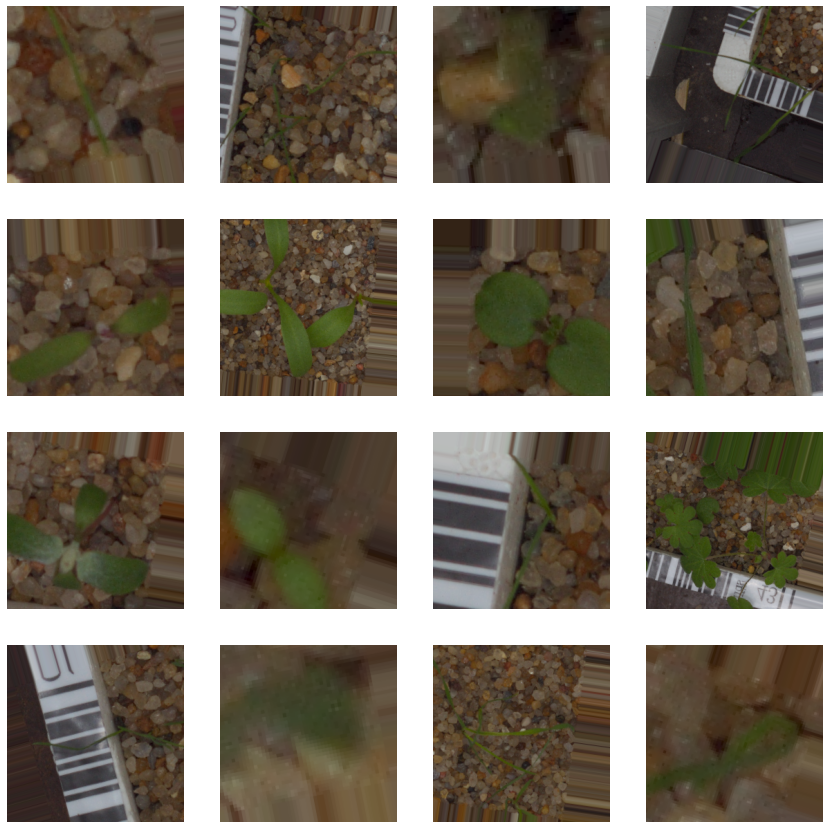

In [17]:
from mpl_toolkits.axes_grid1 import ImageGrid

def show_grid(image_list, nrows, ncols, label_list=None, show_labels=False, figsize=(15,15)):

    fig = plt.figure(None, figsize,frameon=False)
    grid = ImageGrid(fig, 111, 
                     nrows_ncols=(nrows, ncols),  
                     axes_pad=0.5, 
                     share_all=True,
                     )
    for i in range(nrows*ncols):
        ax = grid[i]
        ax.imshow(image_list[i],cmap='gray')
        ax.axis('off')

show_grid(x,4,4,show_labels=True,figsize=(15,15))

In [18]:
modelNN1 = tf.keras.models.Sequential([
    tf.keras.layers.InputLayer(input_shape=(image_size,image_size,3,)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(12, activation='softmax')
    
])

In [19]:
modelNN1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
modelNN1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 196608)            0         
_________________________________________________________________
dense (Dense)                (None, 64)                12582976  
_________________________________________________________________
batch_normalization (BatchNo (None, 64)                256       
_________________________________________________________________
dense_1 (Dense)              (None, 128)               8320      
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 128)               512       
_________________________________________________________________
dense_2 (Dense)              (None, 12)                1

In [26]:
history_nn = modelNN1.fit(train_gen,
          epochs=20, 
          batch_size=159,
          validation_data=val_gen,
          verbose = 1
)

Epoch 1/20
120/120 [==============================] - 125s 1s/step - loss: 1.7150 - accuracy: 0.3826 - val_loss: 3.9924 - val_accuracy: 0.2029
Epoch 2/20
120/120 [==============================] - 125s 1s/step - loss: 1.6846 - accuracy: 0.4046 - val_loss: 1.8577 - val_accuracy: 0.3239
Epoch 3/20
120/120 [==============================] - 125s 1s/step - loss: 1.6742 - accuracy: 0.4104 - val_loss: 2.2752 - val_accuracy: 0.2681
Epoch 4/20
120/120 [==============================] - 125s 1s/step - loss: 1.6432 - accuracy: 0.4182 - val_loss: 2.1066 - val_accuracy: 0.3176
Epoch 5/20
120/120 [==============================] - 125s 1s/step - loss: 1.6362 - accuracy: 0.4206 - val_loss: 1.9827 - val_accuracy: 0.3302
Epoch 6/20
120/120 [==============================] - 125s 1s/step - loss: 1.6580 - accuracy: 0.4169 - val_loss: 1.7591 - val_accuracy: 0.3680
Epoch 7/20
120/120 [==============================] - 125s 1s/step - loss: 1.6312 - accuracy: 0.4109 - val_loss: 1.8865 - val_accuracy: 0.2955

## Model 3: Convolutional Neural Network

In [41]:
modelCNN1 = tf.keras.models.Sequential()

# Input layer
modelCNN1.add(tf.keras.layers.InputLayer(input_shape=(image_size,image_size,3,)))
modelCNN1.add(tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
# Max Pool layer 
modelCNN1.add(tf.keras.layers.MaxPool2D(pool_size = (2,2)))
# Normalization layer
modelCNN1.add(tf.keras.layers.BatchNormalization())
# 2D Convolution layer
modelCNN1.add(tf.keras.layers.Conv2D(64, kernel_size=(3,3), strides = (1,1), activation='relu'))
modelCNN1.add(tf.keras.layers.MaxPool2D(pool_size = (2,2)))
modelCNN1.add(tf.keras.layers.BatchNormalization())
modelCNN1.add(tf.keras.layers.Conv2D(128, kernel_size=(3,3), strides = (1,1), activation='relu'))
modelCNN1.add(tf.keras.layers.MaxPool2D(pool_size = (2,2)))
modelCNN1.add(tf.keras.layers.BatchNormalization())
modelCNN1.add(tf.keras.layers.Conv2D(128, kernel_size=(3,3), strides = (1,1), activation='relu'))
modelCNN1.add(tf.keras.layers.MaxPool2D(pool_size = (2,2)))
# Global Max Pool layer
modelCNN1.add(tf.keras.layers.GlobalMaxPool2D())
modelCNN1.add(tf.keras.layers.Flatten())
modelCNN1.add(tf.keras.layers.Dense(128, activation='relu'))
modelCNN1.add(tf.keras.layers.Dropout(0.2))
modelCNN1.add(tf.keras.layers.Dense(64, activation='relu'))
modelCNN1.add(tf.keras.layers.BatchNormalization())
modelCNN1.add(tf.keras.layers.Dense(12, activation='softmax'))

In [42]:
opt = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.001, amsgrad=False)
modelCNN1.compile(optimizer = opt, loss = 'categorical_crossentropy', metrics = ['accuracy'])
modelCNN1.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 254, 254, 64)      1792      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 127, 127, 64)      0         
_________________________________________________________________
batch_normalization_10 (Batc (None, 127, 127, 64)      256       
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 125, 125, 64)      36928     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 62, 62, 64)        0         
_________________________________________________________________
batch_normalization_11 (Batc (None, 62, 62, 64)        256       
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 60, 60, 128)      

In [44]:
checkpoint = tf.keras.callbacks.ModelCheckpoint('plant_classifier.h5', 
                                                    save_best_only=True, 
                                                    monitor='val_accuracy', 
                                                    mode='max', 
                                                    verbose = 1)

In [45]:
history = modelCNN1.fit(train_gen,
          epochs=20, 
          steps_per_epoch= 3803//batch_size, 
          validation_data=val_gen,
          validation_steps = 947//batch_size, 
          callbacks = [checkpoint],
          verbose = 1
)

Epoch 1/20
118/118 [==============================] - 167s 1s/step - loss: 1.1518 - accuracy: 0.6127 - val_loss: 4.8701 - val_accuracy: 0.1409

Epoch 00001: val_accuracy improved from -inf to 0.14090, saving model to plant_classifier.h5
Epoch 2/20
118/118 [==============================] - 167s 1s/step - loss: 0.9613 - accuracy: 0.6788 - val_loss: 4.2725 - val_accuracy: 0.1483

Epoch 00002: val_accuracy improved from 0.14090 to 0.14826, saving model to plant_classifier.h5
Epoch 3/20
118/118 [==============================] - 168s 1s/step - loss: 0.7733 - accuracy: 0.7471 - val_loss: 2.5271 - val_accuracy: 0.2387

Epoch 00003: val_accuracy improved from 0.14826 to 0.23870, saving model to plant_classifier.h5
Epoch 4/20
118/118 [==============================] - 167s 1s/step - loss: 0.6882 - accuracy: 0.7687 - val_loss: 1.1761 - val_accuracy: 0.6109

Epoch 00004: val_accuracy improved from 0.23870 to 0.61094, saving model to plant_classifier.h5
Epoch 5/20
118/118 [=======================

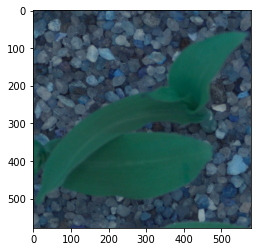

In [47]:
import pickle
weigh= modelCNN1.get_weights()
pklfile= "modelweights.pkl"
try:
    fpkl= open(pklfile, 'wb')    #Python 3     
    pickle.dump(weigh, fpkl, protocol= pickle.HIGHEST_PROTOCOL)
    fpkl.close()
except:
    fpkl= open(pklfile, 'w')    #Python 2      
    pickle.dump(weigh, fpkl, protocol= pickle.HIGHEST_PROTOCOL)
    fpkl.close()

img = cv2.imread('/content/Part-1 - Plant Seedling Classification Data/Seedling - Prediction/Predict.png')
plt.imshow(img)

In [48]:
img = cv2.resize(img, (256,256))
img_batch = np.expand_dims(img, axis=0)
conv_img = modelCNN1.predict(img_batch)
ind=np.argmax(conv_img,axis=1)
print(list(train_gen.class_indices.keys())[ind[0]])

Sugar beet


## When we compare the three models: 

1. SVM : It is a supervised learning technique which gave an accuracy of 15% for image classification.

2. ANN: Next we used an ANN to predict the image classifier which gave an accuracy of 32.7%. Which is double of SVM but still far from being used as an image classifier.

3. CNN: We use convolutions to predict the images. The CNN performed very well and predicted with an accuracy of 82%. CNN out performed both ANN and SVM.

# Task 2 : Explain in depth why CNN out performs neural networks which in turn out perform supervised learning models when it comes to image classification.

### Neural Networks (NN), or more precisely Artificial Neural Networks (ANN), is a class of Machine Learning algorithms that recently received a lot of attention (again!) due to the availability of Big Data and fast computing facilities (most of Deep Learning algorithms are essentially different variations of ANN).The class of ANN covers several architectures including Convolutional Neural Networks (CNN), Recurrent Neural Networks (RNN) eg LSTM and GRU, Autoencoders, and Deep Belief Networks. Therefore, CNN is just one kind of ANN.
### Generally speaking, an ANN is a collection of connected and tunable units (a.k.a. nodes, neurons, and artificial neurons) which can pass a signal (usually a real-valued number) from a unit to another. The number of (layers of) units, their types, and the way they are connected to each other is called the network architecture. A CNN, in specific, has one or more layers of convolution units. A convolution unit receives its input from multiple units from the previous layer which together create a proximity. Therefore, the input units (that form a small neighborhood) share their weights. The convolution units (as well as pooling units) are especially beneficial as:
### They reduce the number of units in the network (since they are many-to-one mappings). This means, there are fewer parameters to learn which reduces the chance of overfitting as the model would be less complex than a fully connected network. They consider the context/shared information in the small neighborhoods. This future is very important in many applications such as image, video, text, and speech processing/mining as the neighboring inputs (eg pixels, frames, words, etc) usually carry related information. Also from our outputs we can see the that CNN outperfromed NN with a very wide gap of accuracy.

# Task 3:

## **DOMAIN**: Automobile
## **CONTEXT**: A brand research company wants to understand which cars or car manufacturers are popular in a certain area of the city or locality. Company has a team which takes pictures of the cars randomly through the day. Using this the company wants to set up an automation which can classify the make of the car once the picture has been given as an input.
## **TASK**: Help to build the image dataset to be used by the AI team to build an image classifier data. Import and display the images in python against their labels. Comment on the challenges faced during this task.

*Hint: An image classifier data requires images as data and their tags/labels/class to which they belong.*

In [49]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(rotation_range=10, width_shift_range=0.1, 
height_shift_range=0.1,shear_range=0.15, 
zoom_range=0.1,channel_shift_range = 10, horizontal_flip=True)

In [50]:
images_path = "/content/drive/MyDrive/Computer Vision Project 1/Cars Images-20210627T095006Z-001.zip"
from zipfile import ZipFile
with ZipFile(images_path,'r') as zip:
  zip.extractall()

In [51]:
images=np.array([1,2,3])
len(images)
image_path = '/content/Cars Images'
images=np.array([])

files=os.listdir(image_path)
for file in files:
    path=image_path+'/'+file
    img=plt.imread(path)
    img=cv2.resize(img,(224,224))
    if len(images)==0:
        images = np.expand_dims(img, 0)
    images=np.append(images,[img],axis=0)
images.shape

(16, 224, 224, 3)

In [56]:
os.mkdir('newcardata')
save_here = './newcardata'
datagen.fit(images)

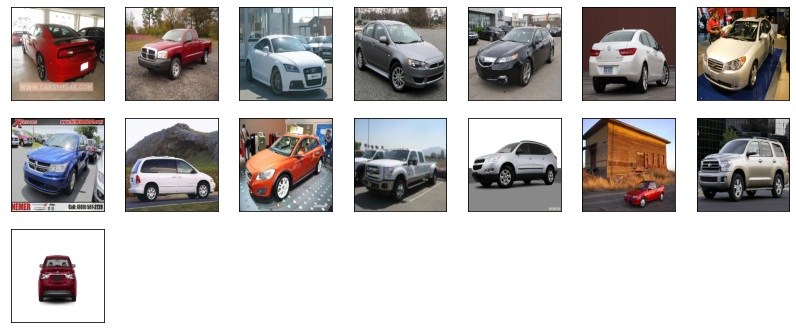

In [54]:
files=os.listdir(image_path)
fig = plt.figure(1, (14, 14))

k = 0
for file in files:
    path=image_path+'/'+file
    img=plt.imread(path)
    img=cv2.resize(img,(224,224))

    
    k += 1
    if k==50:
        break
    ax = plt.subplot(7, 7, k)
    ax.imshow(img, cmap='gray')
    ax.set_xticks([])
    ax.set_yticks([])
plt.show()

# Task 4:

## **DOMAIN**: Botanical research
## **CONTEXT**: University X is currently undergoing some research involving understanding the characteristics of flowers. They already have have invested on curating sample images. They require an automation which can create a classifier capable of determining a flower’s species from a photo
## **DATA DESCRIPTION**: The dataset comprises of images from 17 plant species. It can be downloaded from TensorFlow [ Hint: import tflearn.datasets.oxflower17 as oxflower17 ].
## **PROJECT OBJECTIVE**: Company’s management requires an automation which can create a classifier capable of determining a flower’s species from a photo.

In [67]:
import tflearn.datasets.oxflower17 as oxflower17
x, y = oxflower17.load_data(one_hot=True)

In [68]:
display(x.shape, y.shape)

(1360, 224, 224, 3)

(1360, 17)

In [69]:
modelNN = tf.keras.models.Sequential([
    tf.keras.layers.InputLayer(input_shape=(224,224,3)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(17, activation='softmax')
    
])

Instructions for updating:
Colocations handled automatically by placer.


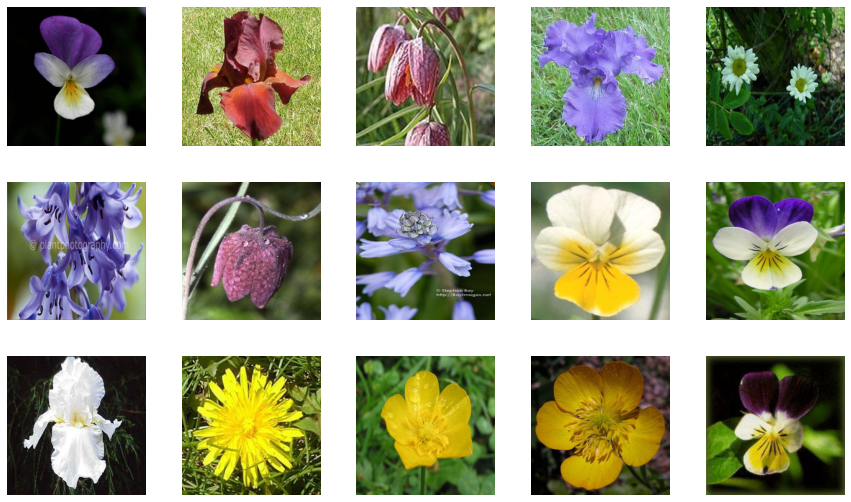

In [71]:
show_grid(x,3,5,show_labels=True,figsize=(15,15))

In [72]:
modelNN.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
modelNN.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_5 (Flatten)          (None, 150528)            0         
_________________________________________________________________
dense_15 (Dense)             (None, 64)                9633856   
_________________________________________________________________
batch_normalization_14 (Batc (None, 64)                256       
_________________________________________________________________
dense_16 (Dense)             (None, 128)               8320      
_________________________________________________________________
dropout_5 (Dropout)          (None, 128)               0         
_________________________________________________________________
batch_normalization_15 (Batc (None, 128)               512       
_________________________________________________________________
dense_17 (Dense)             (None, 17)               

In [73]:
history=modelNN.fit(x, y, batch_size=64, epochs=60, verbose=1, validation_split=0.2, shuffle=True)

Train on 1088 samples, validate on 272 samples
Epoch 1/60
1088/1088 [==============================] - 1s 740us/sample - loss: 2.9066 - acc: 0.1268 - val_loss: 6.2580 - val_acc: 0.1287
Epoch 2/60
1088/1088 [==============================] - 1s 544us/sample - loss: 2.2640 - acc: 0.2748 - val_loss: 4.1718 - val_acc: 0.1471
Epoch 3/60
1088/1088 [==============================] - 1s 535us/sample - loss: 1.9746 - acc: 0.3502 - val_loss: 3.2783 - val_acc: 0.1544
Epoch 4/60
1088/1088 [==============================] - 1s 547us/sample - loss: 1.7933 - acc: 0.4044 - val_loss: 2.7888 - val_acc: 0.1507
Epoch 5/60
1088/1088 [==============================] - 1s 535us/sample - loss: 1.5946 - acc: 0.4623 - val_loss: 2.5387 - val_acc: 0.1985
Epoch 6/60
1088/1088 [==============================] - 1s 544us/sample - loss: 1.4194 - acc: 0.5561 - val_loss: 2.4736 - val_acc: 0.2059
Epoch 7/60
1088/1088 [==============================] - 1s 540us/sample - loss: 1.2702 - acc: 0.6121 - val_loss: 2.2371 - val

In [74]:
#CNN
modelCNN2 = tf.keras.models.Sequential()

# Input layer
# Can be omitted, you can specify the input_shape in other layers
modelCNN2.add(tf.keras.layers.InputLayer(input_shape=(224,224,3,)))

# Here we add a 2D Convolution layer
# Check https://keras.io/api/layers/convolution_layers/convolution2d/ for more info
modelCNN2.add(tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))

# Max Pool layer 
# It downsmaples the input representetion within the pool_size size
modelCNN2.add(tf.keras.layers.MaxPool2D(pool_size = (2,2)))

# Normalization layer
# The layer normalizes its output using the mean and standard deviation of the current batch of inputs.
modelCNN2.add(tf.keras.layers.BatchNormalization())

# 2D Convolution layer
modelCNN2.add(tf.keras.layers.Conv2D(64, kernel_size=(3,3), strides = (1,1), activation='relu'))

# Max Pool layer 
modelCNN2.add(tf.keras.layers.MaxPool2D(pool_size = (2,2)))

# Normalization layer
modelCNN2.add(tf.keras.layers.BatchNormalization())

# 2D Convolution layer
modelCNN2.add(tf.keras.layers.Conv2D(128, kernel_size=(3,3), strides = (1,1), activation='relu'))

# Max Pool layer 
modelCNN2.add(tf.keras.layers.MaxPool2D(pool_size = (2,2)))

# Normalization layer
modelCNN2.add(tf.keras.layers.BatchNormalization())

# 2D Convolution layer
modelCNN2.add(tf.keras.layers.Conv2D(128, kernel_size=(3,3), strides = (1,1), activation='relu'))

# Max Pool layer 
modelCNN2.add(tf.keras.layers.MaxPool2D(pool_size = (2,2)))

# Global Max Pool layer
modelCNN2.add(tf.keras.layers.GlobalMaxPool2D())

# Dense Layers after flattening the data
modelCNN2.add(tf.keras.layers.Flatten())

modelCNN2.add(tf.keras.layers.Dense(128, activation='relu'))

# Dropout
# is used to nullify the outputs that are very close to zero and thus can cause overfitting.
modelCNN2.add(tf.keras.layers.Dropout(0.2))
modelCNN2.add(tf.keras.layers.Dense(64, activation='relu'))

# Normalization layer
modelCNN2.add(tf.keras.layers.BatchNormalization())

#Add Output Layer
modelCNN2.add(tf.keras.layers.Dense(17, activation='softmax')) # = 12 predicted classes
modelCNN2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
modelCNN2.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 222, 222, 64)      1792      
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 111, 111, 64)      0         
_________________________________________________________________
batch_normalization_16 (Batc (None, 111, 111, 64)      256       
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 109, 109, 64)      36928     
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 54, 54, 64)        0         
_________________________________________________________________
batch_normalization_17 (Batc (None, 54, 54, 64)        256       
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 52, 52, 128)      

In [75]:
history=modelCNN2.fit(x, y, batch_size=64, epochs=70, verbose=1, validation_split=0.2, shuffle=True)

Train on 1088 samples, validate on 272 samples
Epoch 1/70
1088/1088 [==============================] - 27s 25ms/sample - loss: 2.6878 - acc: 0.1590 - val_loss: 2.7278 - val_acc: 0.1875
Epoch 2/70
1088/1088 [==============================] - 27s 24ms/sample - loss: 1.9829 - acc: 0.3392 - val_loss: 2.7169 - val_acc: 0.1029
Epoch 3/70
1088/1088 [==============================] - 29s 27ms/sample - loss: 1.6271 - acc: 0.4614 - val_loss: 2.7937 - val_acc: 0.0699
Epoch 4/70
1088/1088 [==============================] - 27s 25ms/sample - loss: 1.3532 - acc: 0.5919 - val_loss: 2.8661 - val_acc: 0.0588
Epoch 5/70
1088/1088 [==============================] - 26s 24ms/sample - loss: 1.2786 - acc: 0.6002 - val_loss: 2.8189 - val_acc: 0.0846
Epoch 6/70
1088/1088 [==============================] - 27s 25ms/sample - loss: 1.1005 - acc: 0.6608 - val_loss: 3.0186 - val_acc: 0.0662
Epoch 7/70
1088/1088 [==============================] - 26s 24ms/sample - loss: 0.9475 - acc: 0.7316 - val_loss: 3.0752 - val

In [76]:
#CNN with Transfer Learning
base = tf.keras.applications.VGG16(include_top=False, weights='imagenet', input_shape=(224,224,3))

base.trainable = False
    
model = tf.keras.Sequential([base, tf.keras.layers.GlobalAveragePooling2D(), tf.keras.layers.Dense(128,name="dense100",activation="relu"),
                              tf.keras.layers.Dropout(0.3), tf.keras.layers.Dense(17,activation="softmax")])

58892288/58889256 [==============================] - 0s 0us/step


In [78]:
base.trainable = True
for i in range(16):
    base.layers[i].trainable = False

base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [79]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 7, 7, 512)         14714688  
_________________________________________________________________
global_average_pooling2d (Gl (None, 512)               0         
_________________________________________________________________
dense100 (Dense)             (None, 128)               65664     
_________________________________________________________________
dropout_7 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_21 (Dense)             (None, 17)                2193      
Total params: 14,782,545
Trainable params: 4,787,473
Non-trainable params: 9,995,072
_________________________________________________________________


In [80]:
checkpoint = tf.keras.callbacks.ModelCheckpoint('flower_classifierNN.h5', #where to save the model
                                                    save_best_only=True, 
                                                    monitor='val_acc', 
                                                    mode='max', 
                                                    verbose = 1)
history=model.fit(x, y, batch_size=64, epochs=30, verbose=1, validation_split=0.2, shuffle=True,callbacks = [checkpoint])

Train on 1088 samples, validate on 272 samples
Epoch 1/30
1088/1088 [==============================] - ETA: 0s - loss: 2.5822 - acc: 0.1765
Epoch 00001: val_acc improved from -inf to 0.35294, saving model to flower_classifierNN.h5
1088/1088 [==============================] - 47s 43ms/sample - loss: 2.5822 - acc: 0.1765 - val_loss: 2.0893 - val_acc: 0.3529
Epoch 2/30
1088/1088 [==============================] - ETA: 0s - loss: 1.7073 - acc: 0.4605
Epoch 00002: val_acc improved from 0.35294 to 0.59559, saving model to flower_classifierNN.h5
1088/1088 [==============================] - 47s 43ms/sample - loss: 1.7073 - acc: 0.4605 - val_loss: 1.4542 - val_acc: 0.5956
Epoch 3/30
1088/1088 [==============================] - ETA: 0s - loss: 1.0726 - acc: 0.6590
Epoch 00003: val_acc improved from 0.59559 to 0.74632, saving model to flower_classifierNN.h5
1088/1088 [==============================] - 46s 42ms/sample - loss: 1.0726 - acc: 0.6590 - val_loss: 0.9581 - val_acc: 0.7463
Epoch 4/30
108

## We saw that with ANN we received an accuracy of 19.49%, With just CNN we received an accuracy of 83% and CNN with transfer learning(VGG16 as the base network) got an accuracy of 92.65% . Hence we can say that CNN with transfer learning performs a lot better than any of the rest.

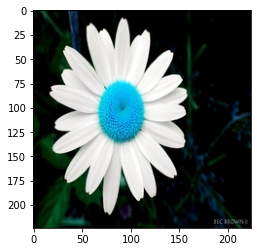

In [94]:
import pickle
weigh= model.get_weights()
pklfile= "modelweights_flower.pkl"
try:
    fpkl= open(pklfile, 'wb')    #Python 3     
    pickle.dump(weigh, fpkl, protocol= pickle.HIGHEST_PROTOCOL)
    fpkl.close()
except:
    fpkl= open(pklfile, 'w')    #Python 2      
    pickle.dump(weigh, fpkl, protocol= pickle.HIGHEST_PROTOCOL)
    fpkl.close()

img = cv2.imread('/content/drive/MyDrive/Computer Vision Project 1/Prediction - Flower.jpg')
plt.imshow(img)

In [96]:
img = cv2.resize(img, (224,224))
img_batch = np.expand_dims(img, axis=0)
conv_img = model.predict(img_batch)
ind=np.argmax(conv_img,axis=1)
print(list(train_gen.class_indices.keys())[ind[0]])

Cleavers
